### Basic Information

CSIC5011 FINAL PROJECT

Name: Yang Shunpeng ID: 20924197

Topic: Sequential Face Image Ordering with Manifold Learning Algorithms

In [1]:
import os
import numpy as np
from sklearn.manifold import Isomap, MDS, LocallyLinearEmbedding,TSNE
from pydiffmap import diffusion_map as dm
from scipy import io
from matplotlib import pyplot as plt
import imageio

### Load data from mat file

In [2]:
dir = os.getcwd()
data_loaded = io.loadmat(dir + "/face.mat")
Y = data_loaded['Y']
print(Y.shape)
print(type(Y))

(112, 92, 33)
<class 'numpy.ndarray'>


### Save the data as image


In [3]:
for i in range(33):
    plt.figure()
    plt.imshow(Y[:,:,i])
    plt.title('%s' % (i+1))
    plt.savefig('img/%s.png' % (i+1))
    plt.close()

### Generate gif based on original out-of-order sequence

In [4]:
frames = []
for i in range(33):
    image = imageio.v2.imread(f'./img/{i+1}.png')
    frames.append(image)
    
imageio.mimsave('./original_seq.gif', # output gif
                frames,          # array of input frames
                duration=200)         # optional: frames per second

### Reshape the data Y

In [5]:
X = np.reshape(Y,[112*92,33]).T
print(X.shape)
print(type(X))

(33, 10304)
<class 'numpy.ndarray'>


In [6]:
print(X[0,:])

[ 42  43  44 ... 113 113 114]


In [7]:
print(Y[:,:,0])

[[ 42  43  44 ...  84 111 142]
 [ 43  43  41 ...  83 106 135]
 [ 42  41  38 ... 106 126 151]
 ...
 [154 155 151 ... 115 114 114]
 [154 154 151 ... 113 114 113]
 [155 155 155 ... 113 113 114]]


### Diffusion map

In [8]:
dmap = dm.DiffusionMap.from_sklearn(n_evecs=2, k=5, epsilon='bgh', alpha=1.0)
Z_dm = -dmap.fit_transform(X)
dm_sort = Z_dm[:,0].argsort()
print("Diffusion map order: ", dm_sort)
frames = []
for i in dm_sort:
    image = imageio.v2.imread(f'./img/{i+1}.png')
    frames.append(image)
    
imageio.mimsave('./dm_seq.gif', # output gif
                frames,          # array of input frames
                duration=200)         # optional: frames per second

Diffusion map order:  [ 9 20 22 14  0 10  7  4 32 13 19 12  1 26 11 30  8  5  2 29 15 16 25 21
 31 17 23  6 24 27 28  3 18]


### Set parameters

In [9]:
n_components = 2
n_neighbors = 5

### MDS

MDS ordering:  [ 9 20 22  7  4 10  0 32 14 13  1 12 19 30 26 11  8  5  2 29 15 18 16  3
 28 25 21 27 23 31 24  6 17]


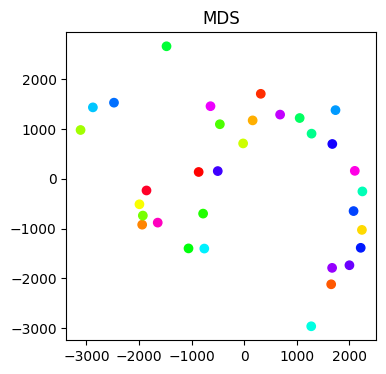

In [10]:
Z_mds = MDS(n_components=n_components, max_iter=100, n_init=1, normalized_stress=False).fit_transform(X)

plt.figure(figsize = (4, 4))
plt.scatter(Z_mds[:, 0], Z_mds[:, 1], c=range(33), cmap=plt.cm.gist_rainbow)
plt.title("MDS")

mds_sort = Z_mds[:,0].argsort()
print("MDS ordering: ", mds_sort)
frames = []
for i in mds_sort:
    image = imageio.v2.imread(f'./img/{i+1}.png')
    frames.append(image)
    
imageio.mimsave('./mds_seq.gif', # output gif
                frames,          # array of input frames
                duration=200)         # optional: frames per second

### Isomap

Isomap ordering:  [ 9 20 22 14  4 10  0 32 13  7 19 12  1 26 30 11  8  5  2 29 15 16 25 21
 31 17 23  6 24 27 28  3 18]


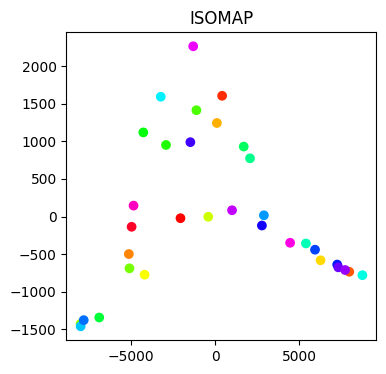

In [11]:
Z_isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X)

plt.figure(figsize = (4, 4))
plt.scatter(Z_isomap[:, 0], Z_isomap[:, 1], c=range(33), cmap=plt.cm.gist_rainbow)
plt.title("ISOMAP")

isomap_sort = Z_isomap[:,0].argsort()
print("Isomap ordering: ", isomap_sort)
frames = []
for i in isomap_sort:
    image = imageio.v2.imread(f'./img/{i+1}.png')
    frames.append(image)
    
imageio.mimsave('./isomap_seq.gif', # output gif
                frames,          # array of input frames
                duration=200)         # optional: frames per second

### Locally Linear Embedding

LLE ordering:  [18  3 28 27 24  6 23 17 31 25 21 16 15 29  2  5  8 11 30 26  1 12 19 13
 32  0  7 10  4 14 22 20  9]


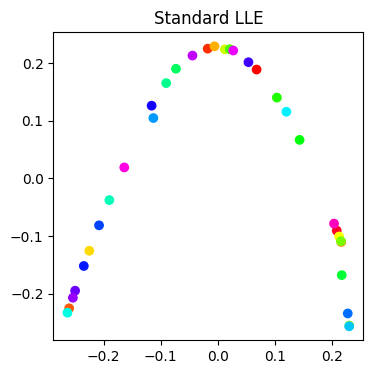

In [12]:
Z_lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, 
                               eigen_solver='auto', method='standard').fit_transform(X)

plt.figure(figsize = (4, 4))
plt.scatter(Z_lle[:, 0], Z_lle[:, 1], c=range(33), cmap=plt.cm.gist_rainbow)
plt.title("Standard LLE")

lle_sort = Z_lle[:,0].argsort()
print("LLE ordering: ", lle_sort)
frames = []
for i in isomap_sort:
    image = imageio.v2.imread(f'./img/{i+1}.png')
    frames.append(image)
    
imageio.mimsave('./lle_seq.gif', # output gif
                frames,          # array of input frames
                duration=200)         # optional: frames per second

### Modified LLE

Modified LLE ordering:  [18  3 27 28 24  6 23 17 31 25 21 16 15 29  2  5  8 11 30 26 19  1 12 13
 32  0  7  4 10 14 22 20  9]


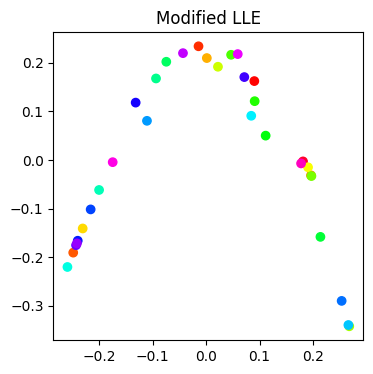

In [13]:
Z_mlle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, 
                               eigen_solver='auto', method='modified').fit_transform(X)

plt.figure(figsize = (4, 4))
plt.scatter(Z_mlle[:, 0], Z_mlle[:, 1], c=range(33), cmap=plt.cm.gist_rainbow)
plt.title("Modified LLE")

mlle_sort = Z_mlle[:,0].argsort()
print("Modified LLE ordering: ", mlle_sort)
frames = []
for i in isomap_sort:
    image = imageio.v2.imread(f'./img/{i+1}.png')
    frames.append(image)
    
imageio.mimsave('./mlle_seq.gif', # output gif
                frames,          # array of input frames
                duration=200)         # optional: frames per second

### LTSA-embedding

LTSA ordering:  [ 9 20 22 14 10  4 32  7  0 13 19 12  1 30 26 11  8  5  2 29 15 16 25 21
 31 17 23  6 24 27 28  3 18]


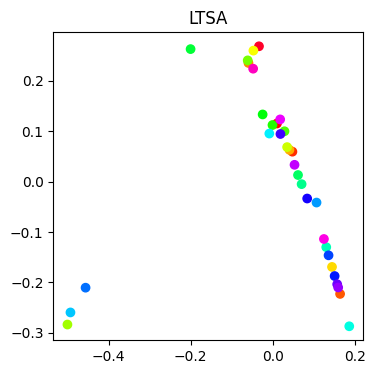

In [14]:
Z_ltsa = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, 
                               eigen_solver='auto', method='ltsa').fit_transform(X)

plt.figure(figsize = (4, 4))
plt.scatter(Z_ltsa[:, 0], Z_ltsa[:, 1], c=range(33), cmap=plt.cm.gist_rainbow)
plt.title("LTSA")

ltsa_sort = Z_ltsa[:,0].argsort()
print("LTSA ordering: ", ltsa_sort)
frames = []
for i in isomap_sort:
    image = imageio.v2.imread(f'./img/{i+1}.png')
    frames.append(image)
    
imageio.mimsave('./ltsa_seq.gif', # output gif
                frames,          # array of input frames
                duration=200)         # optional: frames per second

### t-SNE

t-SNE ordering:  [ 2 29 15  5 21 11 30 16  8 25 26  1 31 17 12 23  0 32  6  7  4 19 10 13
 24 28 27  3 14 18 22 20  9]


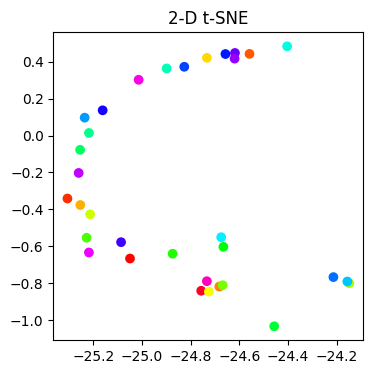

In [15]:
Z_tsne = TSNE(n_components=n_components, init='pca', random_state=0).fit_transform(X)

plt.figure(figsize = (4, 4))
plt.scatter(Z_tsne[:, 0], Z_tsne[:, 1], c=range(33), cmap=plt.cm.gist_rainbow)
plt.title("2-D t-SNE")

tsne_sort = Z_tsne[:,0].argsort()
print("t-SNE ordering: ", tsne_sort)
frames = []
for i in isomap_sort:
    image = imageio.v2.imread(f'./img/{i+1}.png')
    frames.append(image)
    
imageio.mimsave('./tsne_seq.gif', # output gif
                frames,          # array of input frames
                duration=200)         # optional: frames per second

### Order Index Center

In [16]:
index_center = 1.0 / 7.0 * (dm_sort + mds_sort + isomap_sort + lle_sort + mlle_sort + ltsa_sort + tsne_sort)

In [17]:
dist = [np.linalg.norm(dm_sort-index_center), 
       np.linalg.norm(mds_sort-index_center),
       np.linalg.norm(isomap_sort-index_center),
       np.linalg.norm(lle_sort-index_center),
       np.linalg.norm(mlle_sort-index_center),
       np.linalg.norm(ltsa_sort-index_center),
       np.linalg.norm(tsne_sort-index_center)]

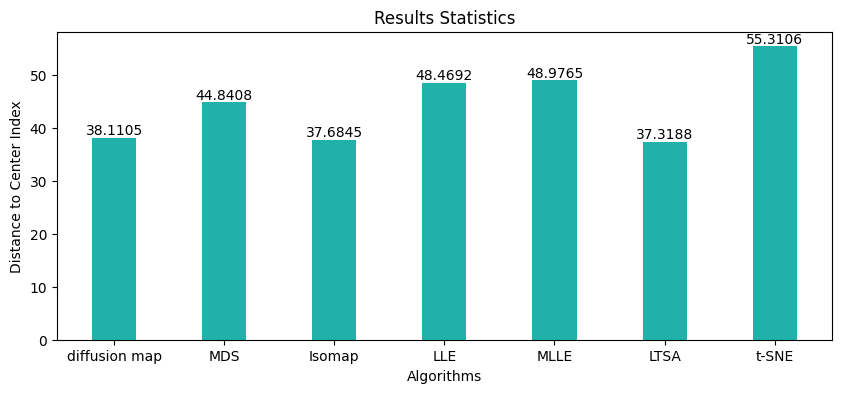

In [18]:
methods = ["diffusion map", "MDS", "Isomap", "LLE", "MLLE", "LTSA", "t-SNE"]

fig, ax = plt.subplots(figsize = (10, 4))
bars = ax.bar(methods, dist, color ='lightseagreen',width=0.4)

ax.bar_label(bars)
    
plt.xlabel("Algorithms")
plt.ylabel("Distance to Center Index")
plt.title("Results Statistics")
plt.show()

In [19]:
np.savetxt("results.csv", [dm_sort, mds_sort, isomap_sort, lle_sort, mlle_sort, ltsa_sort, tsne_sort], delimiter=",")